In [3]:
import os
import time
import sys
sys.path.append('./BASS/')
sys.path.append('./Utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from GMM import GMM_model

In [40]:
pathData = './Data/'
DataName = 'toy'
condition = [0,1,2]  # Append to the list in order to see GMM outputs on more datasets at once

pathGMM = './GMM/'
GMMName = 'toy'

In [41]:
datasets = []

for n in condition:
    datasets.append(np.load(pathData + DataName + "_dataset_condition{}.npy".format(n)))


means_ = np.load(pathGMM + GMMName + '_means.npy')
covars_ = np.load(pathGMM + GMMName + '_covars.npy')
weights_ = np.load(pathGMM + GMMName + '_weights.npy')

model_fit = GMM_model(means_.shape[0])
model_fit._read_params(means_,covars_,weights_)

In [42]:
print(means_.shape)
print(means_)

(7, 2)
[[ 0.49155734 -0.25752363]
 [-2.57443025  1.35235773]
 [-1.35223622 -1.37119193]
 [ 2.51658204  1.67831425]
 [-1.34885449 -2.47417702]
 [ 2.7092646  -1.62768155]
 [-0.05688236  2.88746642]]


In [43]:
# Predict the classes assigned to each state in each dataset
states = []

for i,data in enumerate(datasets):
    states.append(np.argmax(model_fit._compute_posterior(data,i),axis=0))

In [ ]:
# Perform PCA for visualization if needed
X = np.vstack(datasets)
pca = PCA(n_components=2)
pca.fit_transform(X)

In [44]:
# Visualize clusters in a 2D space
V = np.vstack(datasets) # Set V = X in order to use the PCA output
clusters = np.hstack(states)

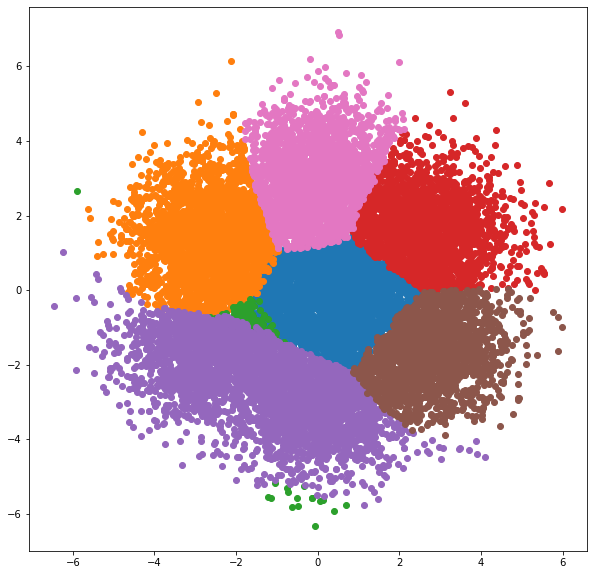

In [45]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

for c in range(means_.shape[0]):
    idx = np.asarray(np.where(clusters == c)[0])
    ax.scatter(V[idx,0],V[idx,1],color = 'C%d'%c)